<a href="https://colab.research.google.com/github/manish-anandani/Data-Science-Projects/blob/main/Predict_Bike_Sharing_Users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement


Predict the **bike-sharing counts per hour** based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, we will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

In [1]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [2]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Data Loading

In [3]:
# Read the hour.csv files
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

print the first five rows of dataset

In [4]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df_hour.shape, df_day.shape

((17379, 17), (731, 16))

## Finding 1
On the first level of examination - found that day.csv is a consolidation of hour.csv. It consolidates the following columns - **weathersit	temp	atemp	hum	windspeed	casual	registered	cnt** for 24 hours of the day


---


*Conclusion/Action*
1.   We will focus on the **hour.csv** as our primary day source.



print the datatypes of the columns

In [6]:
# print the datatypes of the columns
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

In [9]:
# Find if any dupilcate rows
dup_rows = df_hour.duplicated()
print("Duplicate rows :",dup_rows[dup_rows]) # pythonic way of saying dup_rows[dup_rows == True]

print()
# Find if any NaN or missing values
print(f"Any NaN values :\n{df_hour.isnull().any()}")

Duplicate rows : Series([], dtype: bool)

Any NaN values :
instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


In [11]:
# Set default values for plots
plt.rcdefaults()
params = {'axes.grid': True}
plt.rcParams.update(params)

# plt.rcParams.keys()

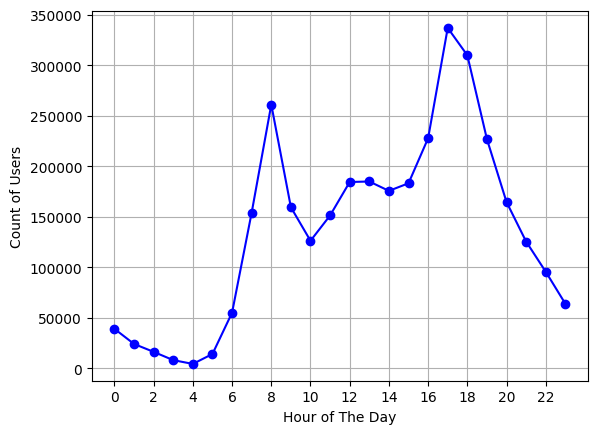

In [13]:
# Visualize the hour (hr) column with an appropriate plot
hrs = df_hour.hr.unique()
hourly_usage_consolidated = df_hour.groupby('hr')['cnt'].sum()
custom_ticks = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]  # Define your custom tick positions for hour

# plt.figure(figsize=(8, 6))  # Width=8 inches, Height=6 inches
plt.xticks(custom_ticks, custom_ticks)
plt.plot(hrs, hourly_usage_consolidated, marker='o', linestyle='-', color='b')
plt.xlabel("Hour of The Day")
plt.ylabel("Count of Users")
plt.grid(True)
plt.show()


[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

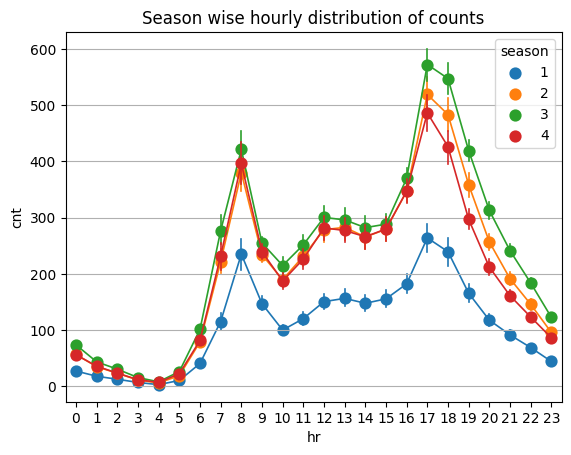

In [14]:
# Visualize the hour (hr) column with an appropriate plot for each season
fig,ax = plt.subplots()
sns.pointplot(data=df_hour[['hr',
                           'cnt',
                           'season']],
              x='hr',
              y='cnt',
              hue='season')
for line in ax.lines:
    line.set_linewidth(1.2)  # Adjust the linewidth as needed

ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

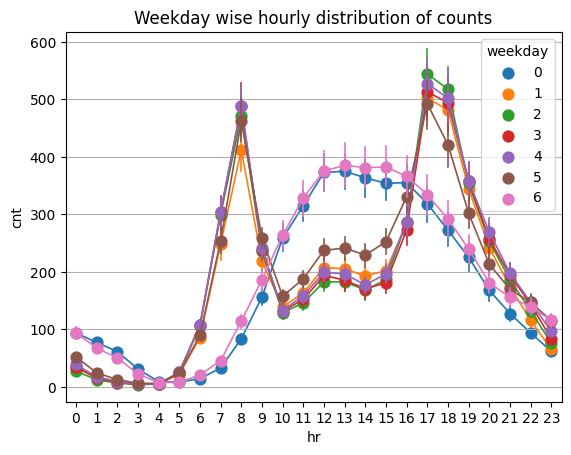

In [15]:
# Visualize the hour (hr) column with an appropriate plot for week days and weekends
fig,ax = plt.subplots()
sns.pointplot(data=df_hour[['hr',
                           'cnt',
                           'weekday']],
              x='hr',
              y='cnt',
              hue='weekday',
              ax=ax)

for line in ax.lines:
    line.set_linewidth(1.2)  # Adjust the linewidth as needed

ax.set(title="Weekday wise hourly distribution of counts")



[Text(0.5, 1.0, 'Monthly distribution of counts')]

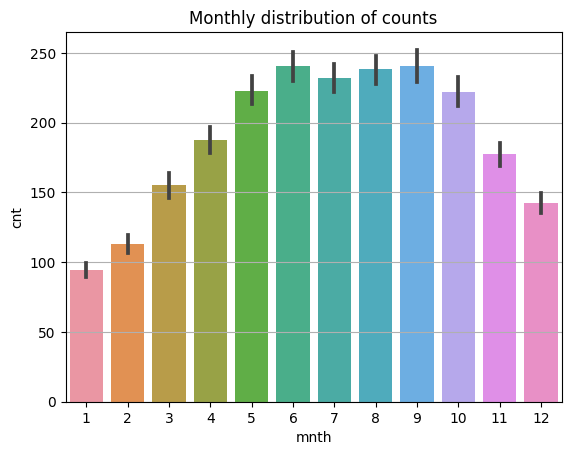

In [16]:
# Visualize the hour (hr) column with an appropriate plot for each month
fig,ax = plt.subplots()
sns.barplot(data=df_hour[['mnth',
                           'cnt']],
              x='mnth',
              y='cnt',
              ax=ax)
ax.set(title="Monthly distribution of counts")


[Text(0.5, 1.0, 'Year distribution of counts')]

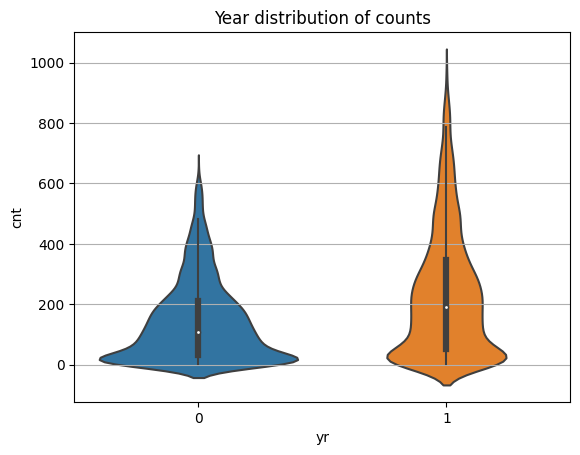

In [17]:
# Visualize the hour (hr) column with an appropriate plot for each year
fig,ax = plt.subplots()
sns.violinplot(data=df_hour[['yr',
                           'cnt']],
              x='yr',
              y='cnt',
              ax=ax)
ax.set(title="Year distribution of counts")



[Text(0.5, 1.0, 'Working days distribution of counts')]

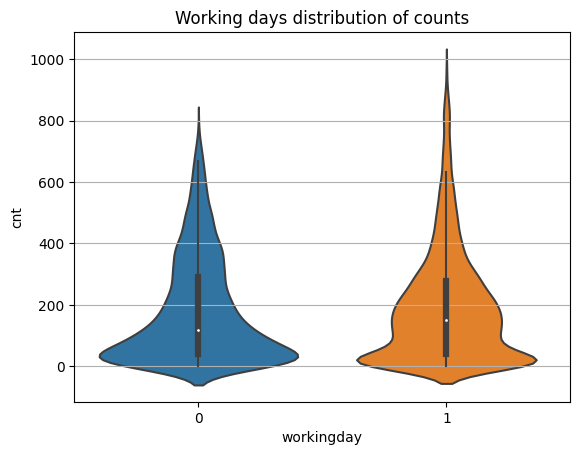

In [18]:
# Visualize the hour (hr) column with an appropriate plot for working days Vs Non-Working days
fig,ax = plt.subplots()
sns.violinplot(data=df_hour[['workingday',
                           'cnt']],
              x='workingday',
              y='cnt',
              ax=ax)
ax.set(title="Working days distribution of counts")

<Axes: xlabel='weekday', ylabel='Count'>

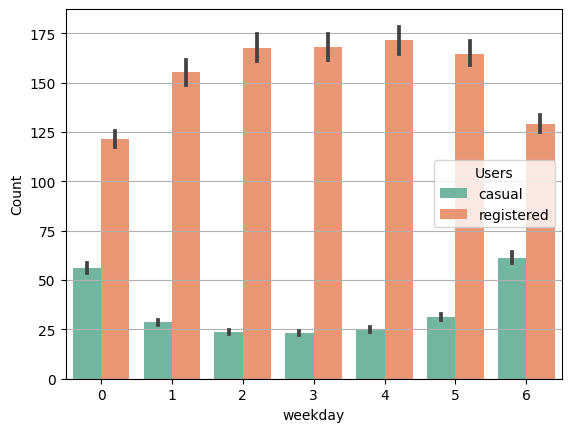

In [ ]:
# Visualize the hour (hr) column with an appropriate plot for Casual users vs Registered users during the week
fig,ax = plt.subplots()
df_hour_temp = df_hour[['weekday','casual','registered']]
df_melted = df_hour_temp.melt(id_vars='weekday', var_name='Users', value_name='Count')
df_melted

sns.barplot(x='weekday', y='Count', hue='Users', data=df_melted, palette='Set2')

## Finding 2
Busy hours for bike sharing - mornings and evenings - seems like commute to and from work for registered users. The casual users use the service more on the weekends


---


*Observations*  
1.   The data distribution plot for counts per hour of the day indicates that the counts per hour of the day is a bimodal data distribution - we can see 2 distinct peaks
2.   Busy hours for bike sharing - **8am and 5pm**
2.   Pattern of usage is different on weekdays and weekends
3.   The usage peaks in summer (mid year)
4.   Count of users is increasing year over year
5.   Casual users are higher on weekends
6.   The overall bike sharing usage is lower in winter season compared to other seasons
8.   Interestingly in the summer months we see a slight dip in the 7th month
9.   The bike sharing usage is increasing year over year
10.  The registered use the service more on the working weekdays and usage for casual users goes up on weekends  

*Actions*  
1. We can train multiple models looking at the data

*   2 peaks of usage for registered users
*   Casual users on weekends
*   Seperate model for winter season

As of now we will continue with 1 model only.

#### Visualize the distribution of count, casual and registered variables

In [20]:
# Distribution of overall counts for casual, registered and total count (cnt)
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

In [21]:
chart = histogram(df_hour, *['cnt'], **{})
chart

In [22]:
chart = histogram(df_hour, *['registered'], **{})
chart

In [23]:
chart = histogram(df_hour, *['casual'], **{})
chart

## Finding 3
The distribution of values of cnt, casual and registered has outliers and a thick tail on the right.


---


*Conclusion/Action*  
1.   Outliers should be removed
2.   We can see if these values can be represented in standard normal distribution


#### Describe the relation of weekday, holiday and working day

All days : 731
Weekends (in days) : 210
Days excluding weekends : 521

Working days : 500
Non Working days : 21

Holidays (that fall on weekdays = non-working days) : 21

Weekdays (encoded) : [0, 1, 2, 3, 4, 5, 6]
Corresponding count of each weekday in dataset : [105, 105, 104, 104, 104, 104, 105]

The relation between weekday, working day and holiday - working days and holidays are a subset of weekdays - non-working days are same as holidays on weekdays 


<Axes: xlabel='weekday', ylabel='holiday'>

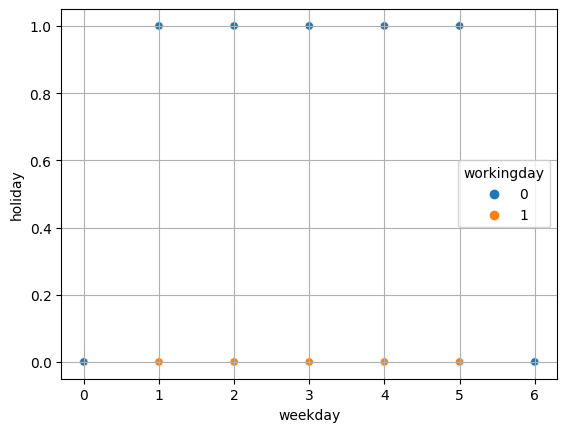

In [24]:
# Total days
all_days = df_day['weekday'].value_counts().sum()
cnt_days_in_wkends = df_day[(df_day['weekday'] == 0) | (df_day['weekday'] == 6)].weekday.count()
weekdays = all_days - cnt_days_in_wkends

print("All days :",all_days)
print("Weekends (in days) :", cnt_days_in_wkends)
print("Days excluding weekends :", weekdays)
print()

working_non_working_days = df_day[(df_day['weekday'] != 0) & (df_day['weekday'] != 6)].workingday.value_counts()

print("Working days :", working_non_working_days[1])
print("Non Working days :", working_non_working_days[0])
print()

print("Holidays (that fall on weekdays = non-working days) :",len(df_day[df_day['holiday']==1]))
print()

df_wkday = pd.DataFrame(df_day['weekday'].value_counts().sort_index())
wk_day = list(df_wkday.index)
wk_day_count = list(df_wkday.weekday)
print("Weekdays (encoded) :",wk_day)
print("Corresponding count of each weekday in dataset :", wk_day_count)
print()

print("The relation between weekday, working day and holiday - working days and holidays are a subset of weekdays - non-working days are same as holidays on weekdays ")

sns.scatterplot(data=df_hour, x="weekday", y="holiday", hue="workingday")

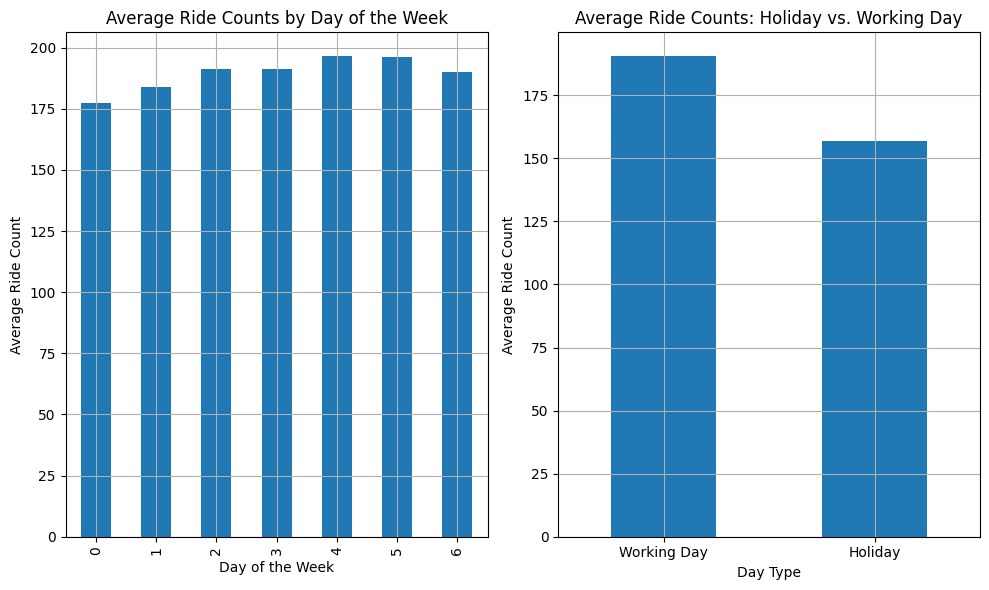

In [26]:
# Calculate average ride counts for week days
avg_rides_by_weekday = df_hour.groupby('weekday')['cnt'].mean()
# Create bar plots
plt.figure(figsize=(10, 6))
# Average ride counts by week days
plt.subplot(1, 2, 1)
avg_rides_by_weekday.plot(kind='bar')
plt.title('Average Ride Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Count')
# Calculate average ride counts for holidays and working days
avg_rides_by_holiday = df_hour.groupby('holiday')['cnt'].mean()
# Average ride counts by holiday vs. working day
plt.subplot(1, 2, 2)
avg_rides_by_holiday.plot(kind='bar')
plt.title('Average Ride Counts: Holiday vs. Working Day')
plt.xticks([0, 1], ['Working Day', 'Holiday'], rotation=0)
plt.xlabel('Day Type')
plt.ylabel('Average Ride Count')
plt.tight_layout()
plt.show()

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

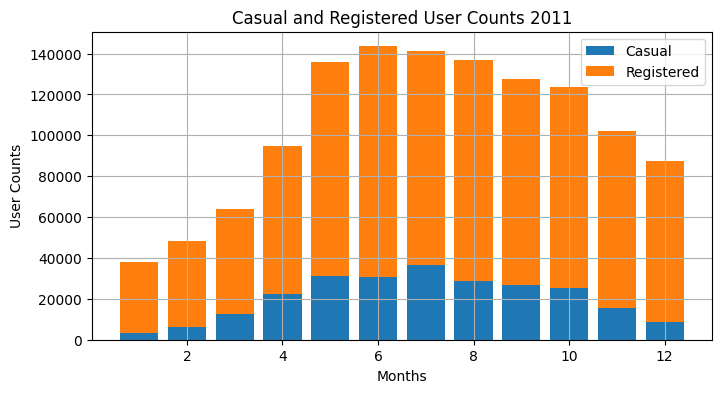

In [29]:
# stacked bar chart for year 2011
# Convert the date column to datetime format
df_day["date"] = pd.to_datetime(df_day['dteday'])
df_day['year'] = df_day['date'].dt.year
df_day['month'] = df_day['date'].dt.month

for year in [2011]:
  df_temp = df_day[df_day['year'] == year]

  months = df_temp['month'].unique()
  casual = list(df_temp.groupby(df_temp["month"])['casual'].sum())
  registered = list(df_temp.groupby(df_temp["month"])['registered'].sum())

  categories = months
  list1 = casual
  list2 = registered

  # Create a stacked bar graph
  plt.figure(figsize=(8, 4))
  plt.bar(categories, list1, label='Casual')
  plt.bar(categories, list2, bottom=list1, label='Registered')

  # Customize the plot
  plt.xlabel('Months')
  plt.ylabel('User Counts')
  plt.title('Casual and Registered User Counts 2011')
  plt.legend()

  # Show the plot
  plt.show()




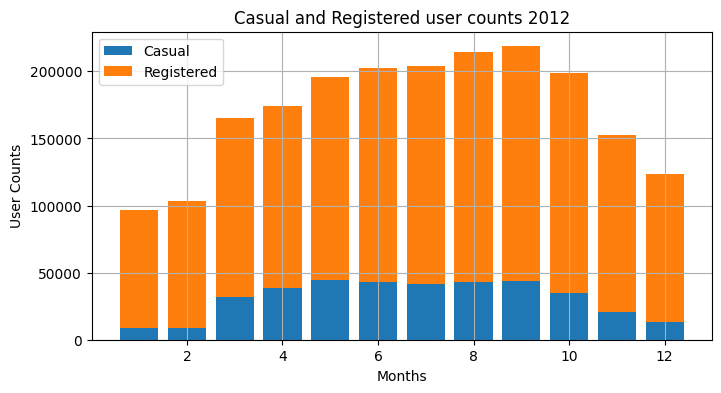

In [30]:
# stacked bar chart for year 2012
for year in [2012]:
  df_temp = df_day[df_day['year'] == year]

  months = df_temp['month'].unique()
  casual = list(df_temp.groupby(df_temp["month"])['casual'].sum())
  registered = list(df_temp.groupby(df_temp["month"])['registered'].sum())

  categories = months
  list1 = casual
  list2 = registered

  # Create a stacked bar graph
  plt.figure(figsize=(8, 4))
  plt.bar(categories, list1, label='Casual')
  plt.bar(categories, list2, bottom=list1, label='Registered')

  # Customize the plot
  plt.xlabel('Months')
  plt.ylabel('User Counts')
  plt.title('Casual and Registered user counts 2012')
  plt.legend()

  # Show the plot
  plt.show()

#### Analyze the correlation between features with heatmap

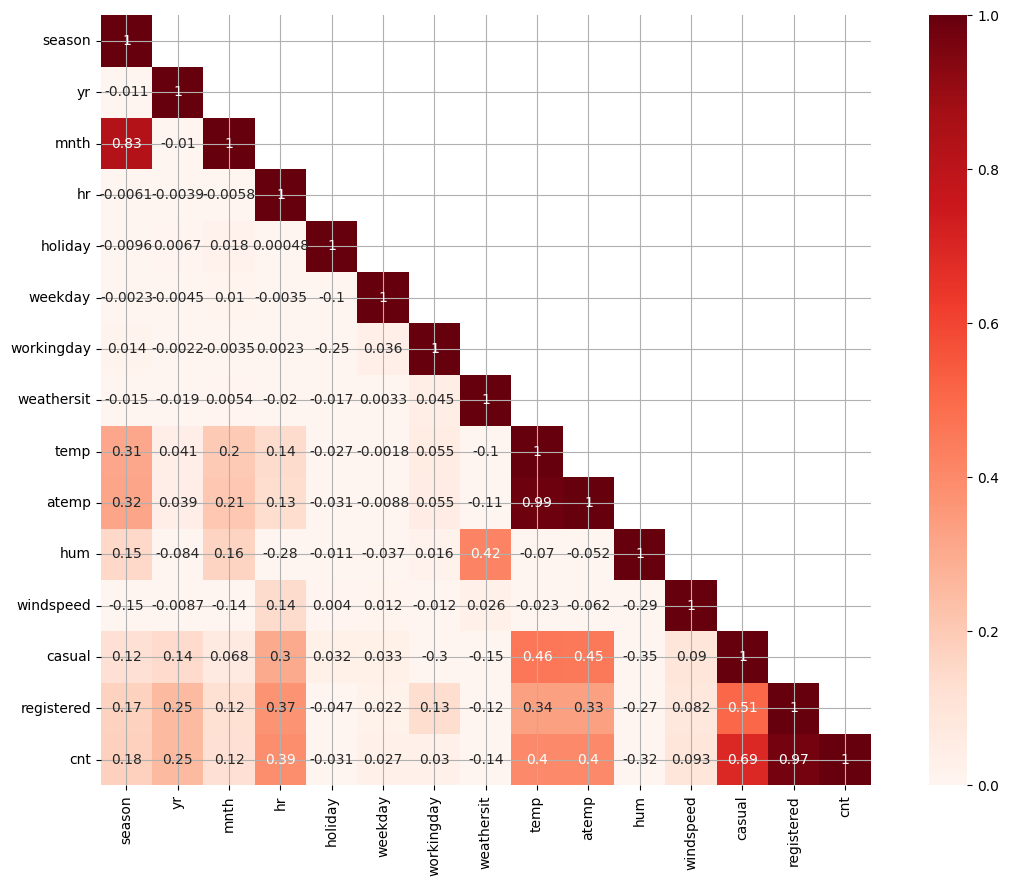

In [32]:
# pick all the columns to display correlation matrix

df_hour_corr = df_hour[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
matrix = df_hour_corr.corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False

plt.figure(figsize=(15, 10))
sns.heatmap(matrix, mask=heat, vmax=1.0, vmin=0.0, square=True, annot=True, cmap="Reds")
plt.show()

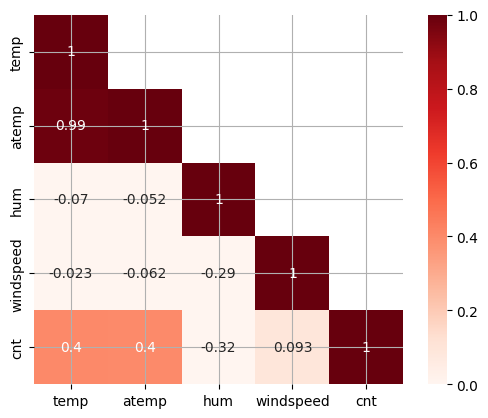

In [31]:
# pick the columns that would contribute to target

df_hour_corr = df_hour[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
matrix = df_hour_corr.corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False

# plt.figure(figsize=(15, 10))
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")
plt.show()

## Finding 4
Correlation analysis

---

1.   We can remove the categotical RVs as they do not seem to add value in the corelation analysis
2.   Casual and registered are directly contributing to cnt hence can be removed - also they are part of the target variables
3.   temp and atemp are highly corelated hence either one can be included in the final analysis
4.   Windspeed seems to have no corelation with the count of users


#### Visualize the box plot of casual and registered variables to check the outliers

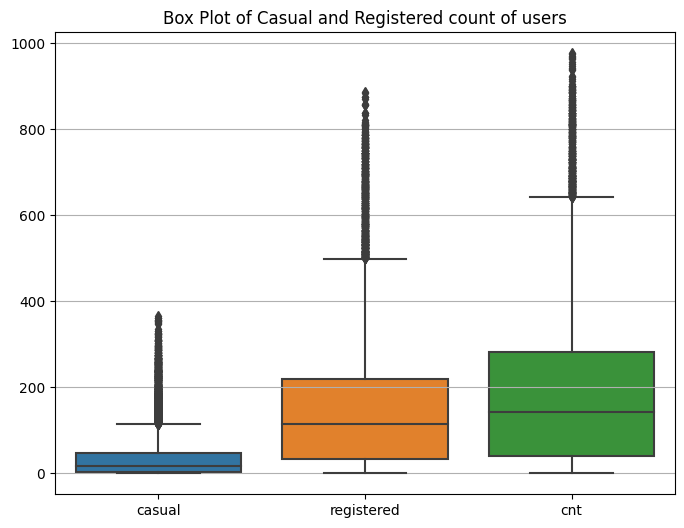

In [33]:
# YOUR CODE HERE

df_outliers = df_hour[['casual','registered','cnt']]

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_outliers)
plt.title('Box Plot of Casual and Registered count of users')
plt.show()

In [34]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [35]:
# Remove outliers

def cap_outliers(col_name, df_temp):

  df_temp = df_temp.copy()

  # Calculate the 25 and 75 percentiles
  Q1 = df_temp[col_name].quantile(0.25)
  Q3 = df_temp[col_name].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # print(lower_bound, upper_bound)

  # Cap the lower side outliers
  df_temp[col_name] = df_temp[col_name].apply(lambda x: max(x, lower_bound))

  # Cap the upper side outliers
  df_temp[col_name] = df_temp[col_name].apply(lambda x: min(x, upper_bound))

  # print(df_temp[col_name].value_counts())

  return df_temp

col = ['casual', 'registered', 'cnt']

df_hour_clean = cap_outliers(col[0], df_hour)
df_hour_clean = cap_outliers(col[1], df_hour_clean)
df_hour_clean = cap_outliers(col[2], df_hour_clean)

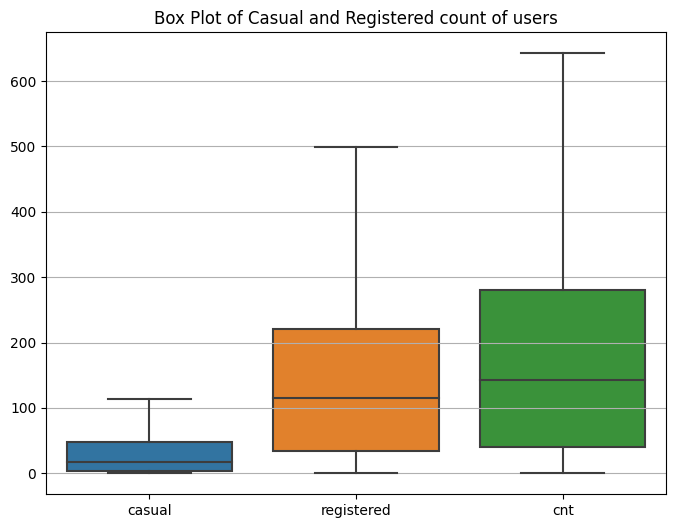

In [43]:
# Box plot to see if the outliers have been adjusted
df_outliers = df_hour_clean[['casual','registered','cnt']]

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_outliers)
plt.title('Box Plot of Casual and Registered count of users')
plt.show()

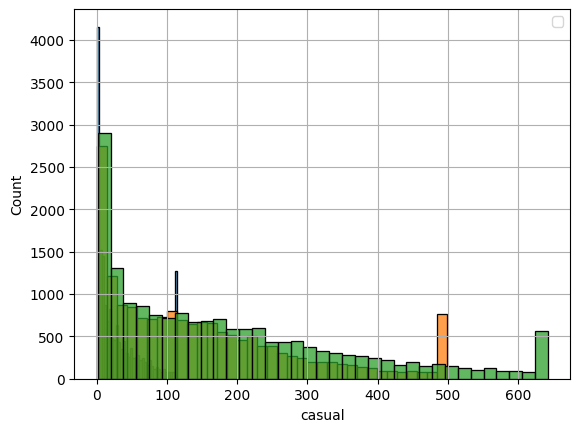

In [42]:
sns.histplot(data=df_hour_clean, x='casual')
sns.histplot(data=df_hour_clean, x='registered')
sns.histplot(data=df_hour_clean, x='cnt')
plt.show()

### Pre-processing and Data Engineering (1 point)

In [328]:
# Check if any differences in original data and cleaned data

df_hour.info()
df_hour_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

# Pre-processing

---



1. The need to preprocess data is to ensure that the data is not biased for models
2. Categorical data is one hot encoded that is for each categorical value a new column is added
3. The continuous data is scaled so that all the the continuous variables are in the same scale  




In [329]:
# Creating pipelines for prepsrocessing of data - Imputing missing values (none) and then scaling data - Standard Scaler for float and One hot encoding for categorical

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer

drop_attrib = ['atemp', 'dteday', 'instant', 'yr', 'holiday', 'workingday']
df_hour_process = df_hour_clean.drop(drop_attrib, axis=1)

num_attribs = df_hour_process.select_dtypes(include=[np.float_]).columns
int_attribs = df_hour_process.select_dtypes(include=[np.int_]).columns
cat_attribs = df_hour_process.select_dtypes(include=[np.object_]).columns

print("List of numerical float attributes :\n", list(num_attribs),)
print("List of numerical int (encoded categories) attributes :\n", list(int_attribs))
print("List of non-numerical object attributes :\n", list(cat_attribs),)


num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")), ("standardize", StandardScaler()) ])
int_pipeline = Pipeline([("impute", SimpleImputer(strategy="most_frequent")),("Encode", OneHotEncoder(handle_unknown="ignore", sparse=False, drop='first'))])


List of numerical float attributes :
 ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
List of numerical int (encoded categories) attributes :
 ['season', 'mnth', 'hr', 'weekday', 'weathersit']
List of non-numerical object attributes :
 []


In [330]:
preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs), ("int", int_pipeline, int_attribs)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')),
                                ('int',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['season', 'mnth', 'hr', 'weekday', 'weathersit'], dtype='object'))])

In [331]:
df_hour_prepro = preprocessing.fit_transform(df_hour_process)
cols = preprocessing.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [332]:
df_hour_prepro = pd.DataFrame(df_hour_prepro, columns=cols, index=df_hour.index)

In [333]:
df_hour_prepro.shape

(17379, 52)

In [334]:
df_hour_prepro

,num__temp,num__hum,num__windspeed,num__casual,num__registered,num__cnt,int__season_2,int__season_3,int__season_4,int__mnth_2,...,int__hr_23,int__weekday_1,int__weekday_2,int__weekday_3,int__weekday_4,int__weekday_5,int__weekday_6,int__weathersit_2,int__weathersit_3,int__weathersit_4
0,-1.334648,0.947372,-1.553889,-0.808879,-1.002197,-0.990898,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.438516,0.895539,-1.553889,-0.665251,-0.861818,-0.851303,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.438516,0.895539,-1.553889,-0.751428,-0.898759,-0.897835,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.334648,0.636370,-1.553889,-0.808879,-1.024362,-1.008347,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.334648,0.636370,-1.553889,-0.895056,-1.090857,-1.078145,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,-1.230779,-0.141137,-0.211691,-0.579074,-0.300302,-0.391804,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17375,-1.230779,-0.141137,-0.211691,-0.665251,-0.499788,-0.566297,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17376,-1.230779,-0.141137,-0.211691,-0.693977,-0.485011,-0.560481,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17377,-1.230779,-0.348473,-0.456099,-0.521623,-0.743604,-0.729158,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [355]:
# Preparing data for model training and testing
y = df_hour_prepro[['num__cnt']]
y_cas = df_hour_prepro[['num__casual']]
y_reg = df_hour_prepro[['num__registered']]

X = df_hour_prepro.drop(['num__cnt','num__casual','num__registered'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13903, 49), (3476, 49), (13903, 1), (3476, 1))

In [346]:
y

,num__cnt
0,-0.990898
1,-0.851303
2,-0.897835
3,-1.008347
4,-1.078145
...,...
17374,-0.391804
17375,-0.566297
17376,-0.560481
17377,-0.729158


In [301]:
# Initial model training using - Linear, DecisionTree and RandomForest Regressors
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, np.ravel(y_train))
print(model.score(X_test, y_test))


0.6417927847644064
0.6108756710271598
0.7871830280559433


In [302]:
# Calculate cross validation scores

from sklearn.model_selection import cross_val_score

regressor_list = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

# Perform cross-validation
# Here, we use 5-fold cross-validation, but you can adjust the 'cv' parameter as needed.
# 'scoring' parameter can be used to specify a scoring metric (e.g., 'neg_mean_squared_error' for mean squared error)

for regressor in regressor_list:
  scores = cross_val_score(regressor, X, y['num__cnt'].values, cv=5, scoring='neg_mean_squared_error')
  # Convert the negative mean squared error scores to positive
  mse_scores = -scores
  print("Regressor :", regressor)
  print(pd.Series(mse_scores).describe())
  print()

Regressor : LinearRegression()
count    5.000000
mean     0.535646
std      0.129629
min      0.373035
25%      0.474907
50%      0.493613
75%      0.661180
max      0.675493
dtype: float64

Regressor : DecisionTreeRegressor()
count    5.000000
mean     0.589658
std      0.062877
min      0.525537
25%      0.561802
50%      0.570550
75%      0.598342
max      0.692059
dtype: float64

Regressor : RandomForestRegressor()
count    5.000000
mean     0.396845
std      0.086883
min      0.312422
25%      0.331680
50%      0.365615
75%      0.459880
max      0.514626
dtype: float64



In [303]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

((13903, 49), (3476, 49), 13903, 3476)

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance



In [304]:
# Linear Regression using Normal equation

X_b = np.column_stack((np.ones(X_train.shape[0]), X_train)) # adding the bias term in the feature matrix
temp = (X_b.T).dot(y_train)
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(temp) # calculating theta
print("Calculated Parameters (theta):\n",theta)

X_test_b = np.column_stack((np.ones(X_test.shape[0]), X_test)) # adding the bias term in the feature matrix
y_pred = X_test_b.dot(theta) # predicting values based on the learned theta

print()
# Evaluating Model's Performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coefficient of Determination:', r2_score(y_test, y_pred))



Calculated Parameters (theta):
 [[-8.45722377e-01]
 [ 3.00041816e-01]
 [-1.17528271e-01]
 [-3.31351082e-02]
 [ 1.93112876e-01]
 [ 1.81578307e-01]
 [ 4.04201568e-01]
 [-2.60844213e-03]
 [ 3.85836524e-02]
 [-8.54635734e-04]
 [ 4.55179085e-02]
 [-6.96632009e-02]
 [-2.15969511e-01]
 [-1.00701594e-01]
 [ 6.45922993e-02]
 [-8.91945152e-03]
 [-1.09695030e-01]
 [-7.04024591e-02]
 [-1.01564345e-01]
 [-1.57698858e-01]
 [-2.04127652e-01]
 [-2.16933494e-01]
 [-1.22936574e-01]
 [ 2.07992078e-01]
 [ 1.00507542e+00]
 [ 1.77303734e+00]
 [ 9.56871801e-01]
 [ 6.22474340e-01]
 [ 7.46103522e-01]
 [ 9.82263827e-01]
 [ 9.45038523e-01]
 [ 8.16138617e-01]
 [ 8.63621893e-01]
 [ 1.25622258e+00]
 [ 1.97552541e+00]
 [ 1.81661495e+00]
 [ 1.33663883e+00]
 [ 9.05621425e-01]
 [ 6.17157644e-01]
 [ 4.08068835e-01]
 [ 1.74954886e-01]
 [ 2.02762095e-03]
 [ 2.24533847e-02]
 [ 3.67810935e-02]
 [ 2.63707459e-02]
 [ 6.81540430e-02]
 [ 8.27386662e-02]
 [-3.86142940e-02]
 [-3.49005849e-01]
 [-5.96975117e-01]]

Mean Absolute Er

#### Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.


In [305]:
# YOUR CODE HERE
def cost_function(X, Y, B):
  m = len(Y)
  J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
  return J

In [306]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
  cost_history = [0] * iterations
  m = len(Y)
  for iteration in range(iterations):
  # Hypothesis Values
    h = X.dot(B)
    # Difference b/w Hypothesis and Actual Y
    loss = h - Y
    # Gradient Calculation
    gradient = X.T.dot(loss) / m
    # Changing Values of B using Gradient
    B = B - alpha * gradient
    # New Cost Value
    cost = cost_function(X, Y, B)
    cost_history[iteration] = cost

  return B, cost_history

In [307]:
# converting target labels as 1D arrays
y_train1 = y_train['num__cnt'].values
y_test1 = y_test['num__cnt'].values

B = np.zeros(X_train.shape[1])
alpha = 1
iter_ = 2000
newB, cost_history = batch_gradient_descent(X_train, y_train1, B, alpha, iter_)

In [308]:
y_ = X_test @ newB


In [309]:
def r2(y_,y):
  ym = sum(y)/len(y)
  sst = np.sum((y - ym)**2)
  ssr = np.sum((y_ - y)**2)
  r2 = 1-(ssr/sst)
  return (r2)
#----------------
r2(y_,y_test1)

0.6279448611573732

#### SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

[-0.47132221] [ 2.91779305e-01 -1.65148306e-01 -2.51927581e-04  1.81670544e-01
  1.59446263e-01  3.98233133e-01  1.15359093e-05  2.82406807e-02
 -7.51663471e-03  1.61020052e-02 -7.40954373e-02 -2.36413079e-01
 -1.05166507e-01  8.18742943e-02  2.91471701e-03 -9.65395104e-02
 -6.53713831e-02 -4.67119683e-01 -5.09880215e-01 -5.53984307e-01
 -5.62141268e-01 -4.70583668e-01 -1.41245322e-01  6.48285569e-01
  1.44477285e+00  5.91282599e-01  2.71219836e-01  3.88729456e-01
  6.30779519e-01  5.74518354e-01  4.48149422e-01  5.00504595e-01
  8.91618536e-01  1.61673853e+00  1.44245226e+00  9.87464105e-01
  5.39130965e-01  2.67802064e-01  4.52724005e-02 -1.76823666e-01
  4.55250871e-03  3.36893348e-03  3.41489967e-02  3.54537887e-03
  5.52542100e-02  1.06911070e-01  2.33613627e-04 -3.37292735e-01
 -2.90270554e-02]

Coefficient of Determination: 0.6298662938181728
Mean Absolute Error: 0.4441746413785476
Mean Squared Error: 0.356079948777845
Mean Root Squared Error: 0.5967243490740469



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


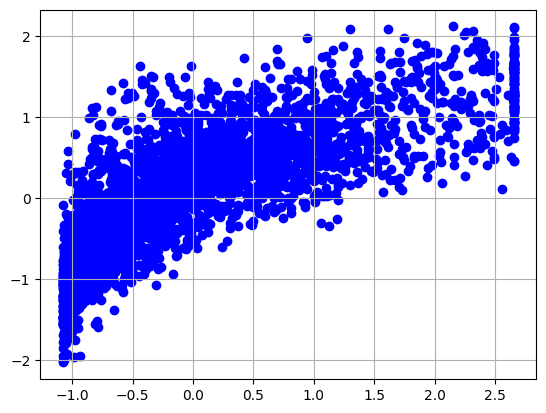

In [310]:
# YOUR CODE HERE
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.05)
sgd_reg.fit(X_train,y_train)
print(sgd_reg.intercept_, sgd_reg.coef_)
pred_sdg = sgd_reg.predict(X_test)

print()
print('Coefficient of Determination:', r2_score(y_test, pred_sdg))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_sdg))
print('Mean Squared Error:', mean_squared_error(y_test, pred_sdg))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred_sdg)))

print()
plt.scatter(y_test, pred_sdg, color='blue', label='Predicted Values')
plt.show()


### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error


<Axes: xlabel='num__cnt', ylabel='Count'>

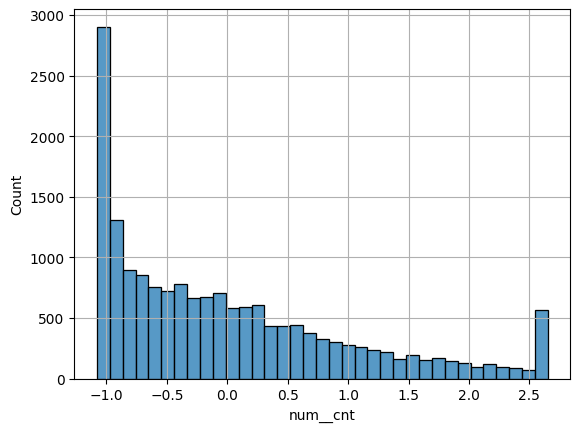

In [311]:

sns.histplot(data=y, x=y['num__cnt'])

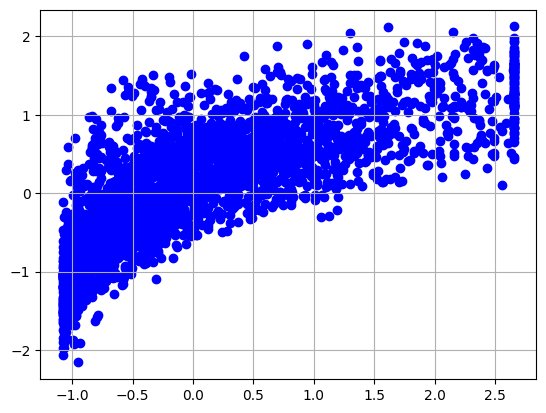

In [319]:
# YOUR CODE HERE
lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
plt.scatter(y_test, pred, color='blue', label='Predicted Values')
plt.show()



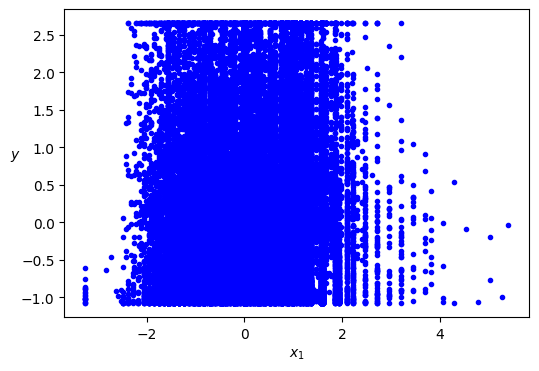

In [356]:
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, "b.")
# plt.plot(X_test, pred, "r-", label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
# plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

In [314]:
train_sizes=np.linspace(0.1, .8, 8)
train_sizes

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

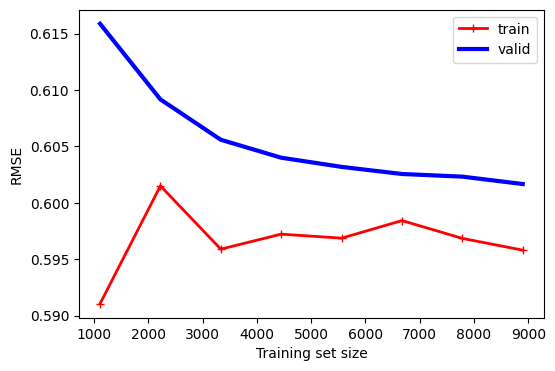

In [318]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_train, y_train, train_sizes=np.linspace(0.1, .8, 8), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
# plt.axis([0, 80, 0, 2.5])
# save_fig("underfitting_learning_curves_plot")

plt.show()

#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [322]:
# YOUR CODE HERE
print('Coefficient of Determination:', r2_score(y_test, pred))
print()
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("Intercept and coefficients :\n",lr.intercept_, lr.coef_)

Coefficient of Determination: 0.6417927847644064

Mean Absolute Error: 0.43262334910560246
Mean Squared Error: 0.34460629962267175
Mean Root Squared Error: 0.5870317705394417
Intercept and coefficients :
 [-0.84572238] [[ 3.00041816e-01 -1.17528271e-01 -3.31351082e-02  1.93112876e-01
   1.81578307e-01  4.04201568e-01 -2.60844213e-03  3.85836524e-02
  -8.54635734e-04  4.55179085e-02 -6.96632009e-02 -2.15969511e-01
  -1.00701594e-01  6.45922993e-02 -8.91945152e-03 -1.09695030e-01
  -7.04024591e-02 -1.01564345e-01 -1.57698858e-01 -2.04127652e-01
  -2.16933494e-01 -1.22936574e-01  2.07992078e-01  1.00507542e+00
   1.77303734e+00  9.56871801e-01  6.22474340e-01  7.46103522e-01
   9.82263827e-01  9.45038523e-01  8.16138617e-01  8.63621893e-01
   1.25622258e+00  1.97552541e+00  1.81661495e+00  1.33663883e+00
   9.05621425e-01  6.17157644e-01  4.08068835e-01  1.74954886e-01
   2.02762095e-03  2.24533847e-02  3.67810935e-02  2.63707459e-02
   6.81540430e-02  8.27386662e-02 -3.86142940e-02 -3.49

In [323]:
# get the name of features
X_train.columns
# append to get a new list
coef = np.append(lr.intercept_,lr.coef_)
feature_names = np.append(['Intercept'], X_train.columns)
# output a dataframe contains coefficients you want
df_temp = pd.DataFrame({"feature_names":feature_names,"coef":coef})
print(df_temp)


        feature_names      coef
0           Intercept -0.845722
1           num__temp  0.300042
2            num__hum -0.117528
3      num__windspeed -0.033135
4       int__season_2  0.193113
5       int__season_3  0.181578
6       int__season_4  0.404202
7         int__mnth_2 -0.002608
8         int__mnth_3  0.038584
9         int__mnth_4 -0.000855
10        int__mnth_5  0.045518
11        int__mnth_6 -0.069663
12        int__mnth_7 -0.215970
13        int__mnth_8 -0.100702
14        int__mnth_9  0.064592
15       int__mnth_10 -0.008919
16       int__mnth_11 -0.109695
17       int__mnth_12 -0.070402
18          int__hr_1 -0.101564
19          int__hr_2 -0.157699
20          int__hr_3 -0.204128
21          int__hr_4 -0.216933
22          int__hr_5 -0.122937
23          int__hr_6  0.207992
24          int__hr_7  1.005075
25          int__hr_8  1.773037
26          int__hr_9  0.956872
27         int__hr_10  0.622474
28         int__hr_11  0.746104
29         int__hr_12  0.982264
30      

<Axes: xlabel='feature_names', ylabel='coef'>

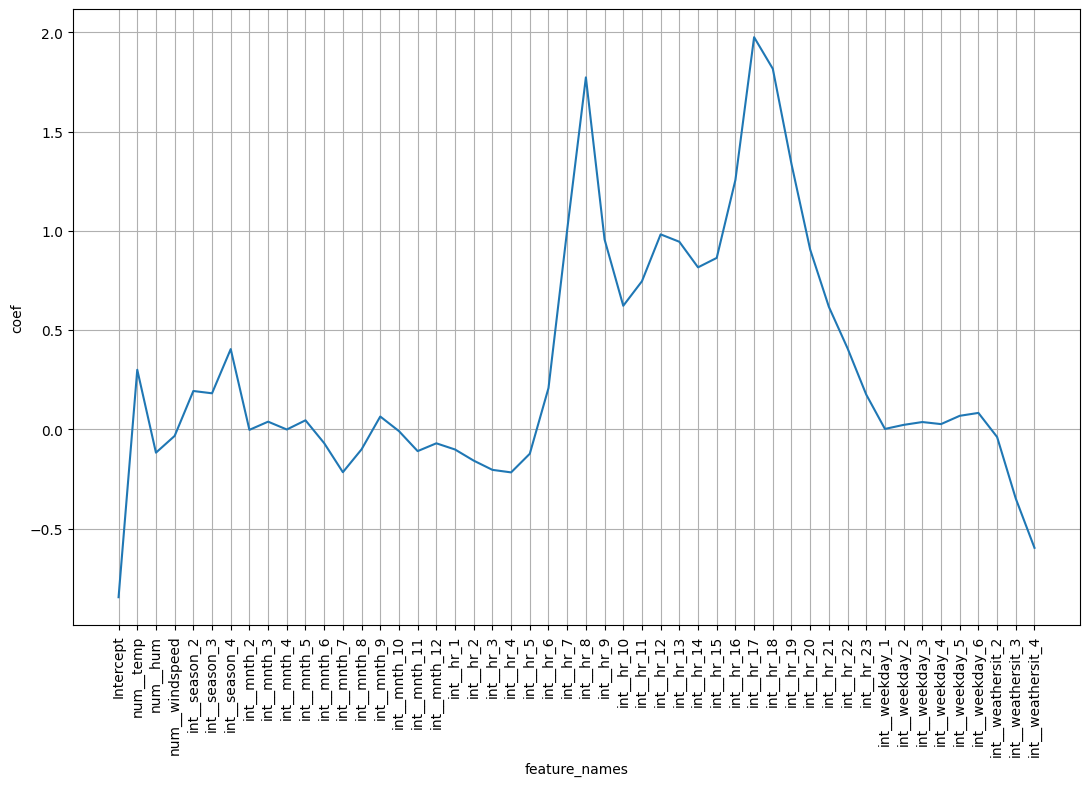

In [324]:
plt.figure(figsize=[13,8])
plt.xticks(rotation='vertical')
sns.lineplot(x=df_temp['feature_names'],y=df_temp['coef'])


<Axes: xlabel='feature_names', ylabel='coef'>

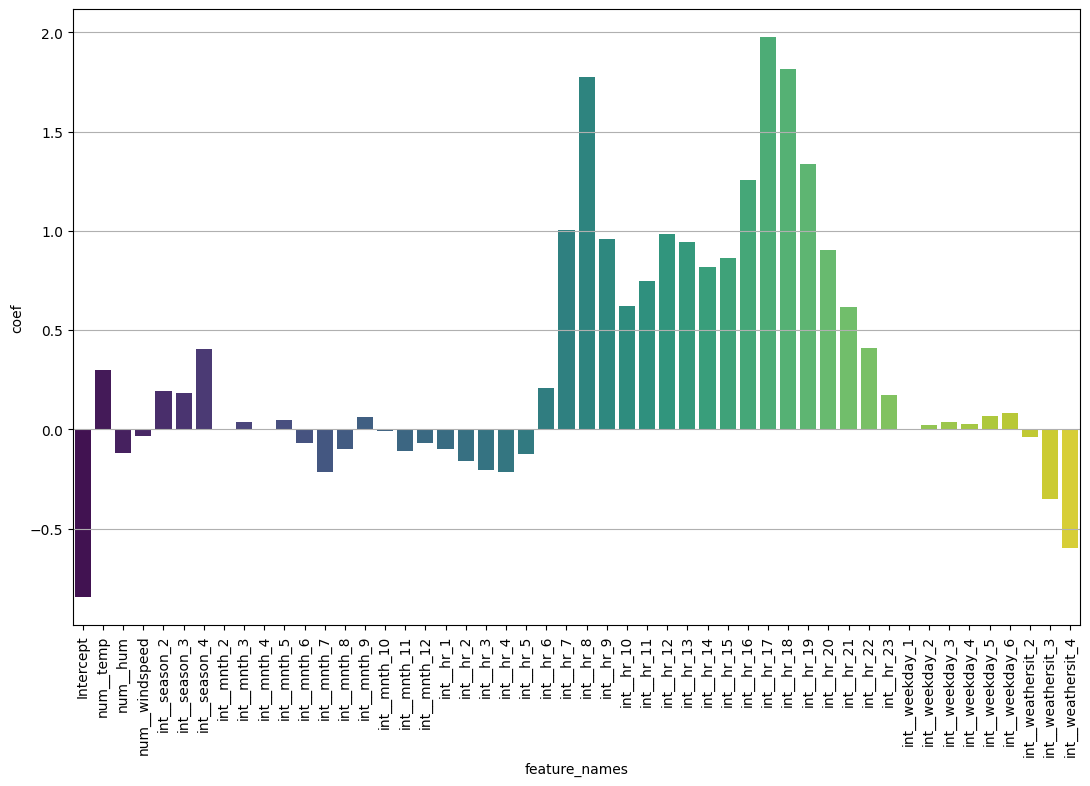

In [268]:
plt.figure(figsize=[13,8])
plt.xticks(rotation='vertical')
sns.barplot(x='feature_names', y='coef', data=df_temp, palette='viridis')

#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

### Regularization methods

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

In [270]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [271]:
# YOUR CODE HERE
for a in alpha:
  Lreg = linear_model.Lasso(alpha = a)                  # instantiate Lasso regressor
  Lreg.fit(X_train, y_train)
  pred_L = Lreg.predict(X_test)
  print(Lreg.score(X_test, y_test))

0.6421658103975769
0.6396318991122996
0.5735682154377586
0.24590626315494402
-0.001029259570660468
-0.001029259570660468
-0.001029259570660468


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted


In [272]:
# YOUR CODE HERE
for a in alpha:
  rdg = linear_model.Ridge(alpha = a)                  # instantiate Ridge regressor
  rdg.fit(X_train, y_train)
  pred = rdg.predict(X_test)
  print(rdg.score(X_test, y_test))

0.6417928149215717
0.6417930861676451
0.6417957820347038
0.6418211564604477
0.6419646696291057
0.6405525344676167
0.6214717010780706


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

In [273]:
# YOUR CODE HERE
for a in alpha:
  Ereg = linear_model.ElasticNet(alpha = a,random_state = 0)    # instantiate ElasticNet regressor
  Ereg.fit(X_train, y_train)
  pred_E = Ereg.predict(X_test)
  print(Ereg.score(X_test, y_test))

0.6420818798699055
0.6397490265539567
0.5968247488273006
0.2609605320814514
-0.001029259570660468
-0.001029259570660468
-0.001029259570660468


### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

In [353]:
# X contains features excluding cnt, casual and registered
# X = df_hour_prepro
# y = df_hour_clean[['cnt']]
# X = df_hour[['season','mnth','hr','weekday','weathersit','temp','hum','windspeed']]
y1 = pd.concat([y,y_cas],axis=1)
y1

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size= 0.2, random_state= 42)

lr1 = LinearRegression()
lr1.fit(X_train, y_train)

pred = lr1.predict(X_test)
print(pred)

print()
print('Coefficient of Determination:', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

[[ 1.37430439  1.53480378]
 [-0.2153444  -0.52173097]
 [-0.86106448 -0.88021333]
 ...
 [-0.30496548  0.19241258]
 [-0.03314501  0.2176572 ]
 [ 0.66199218 -0.2319169 ]]

Coefficient of Determination: 0.6616960164882578
Mean Absolute Error: 0.432383441162267
Mean Squared Error: 0.3251298066271541
Mean Root Squared Error: 0.5702015491272837


### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
